# Correspondence Analysis (CA) - Children Dataset graphs

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
#activation des tables interactifs
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [2]:
from scientisttools import load_children
children = load_children()
children["group"] = ["A"]*4 + ["B"]*5 + ["C"]*5 +["D"]*4
children

unqualified  cep  bepc  high_school_diploma  university thirty  \
rownames                                                                        
money                   51   64    32                   29          17     59   
future                  53   90    78                   75          22    115   
unemployment            71  111    50                   40          11     79   
circumstances            1    7     5                    5           4      9   
hard                     7   11     4                    3           2      2   
economic                 7   13    12                   11          11     18   
egoism                  21   37    14                   26           9     14   
employment              12   35    19                    6           7     21   
finances                10    7     7                    3           1      8   
war                      4    7     7                    6           2      7   
housing                  8   22     7                   10           5     10   
fear                    25   45    38                   38          13     48   
health                  18   27    20                   19           9     13   
work                    35   61    29                   14          12     30   
comfort                  2    4     3                    1           4    NaN   
disagreement             2    8     2                    5           2    NaN   
world                    1    5     4                    6           3    NaN   
to_live                  3    3     1                    3           4    NaN   

              fifty more_fifty group  
rownames                              
money            66         70     A  
future          117         86     A  
unemployment     88        177     A  
circumstances     8          5     A  
hard             17         18     B  
economic         19         17     B  
egoism           34         61     B  
employment       30         28     B  
finances         12          8     B  
war               6         13     C  
housing          27         17     C  
fear             59         52     C  
health           29         53     C  
work             63         58     C  
comfort         NaN        NaN     D  
disagreement    NaN        NaN     D  
world           NaN        NaN     D  
to_live         NaN        NaN     D

In [3]:
from scientisttools import CA
#with supplementary columns
res_ca = CA(n_components=None,row_sup=[14,15,16,17],col_sup=[5,6,7],quali_sup=8)
res_ca.fit(children)

CA(col_sup=[5, 6, 7], n_components=None, quali_sup=8, row_sup=[14, 15, 16, 17])

In [4]:
#with supplementary quantitative variables
res_ca2 = CA(n_components=None,row_sup=[14,15,16,17],quanti_sup=[5,6,7],quali_sup=8)
res_ca2.fit(children)

CA(n_components=None, quali_sup=8, quanti_sup=[5, 6, 7],
   row_sup=[14, 15, 16, 17])

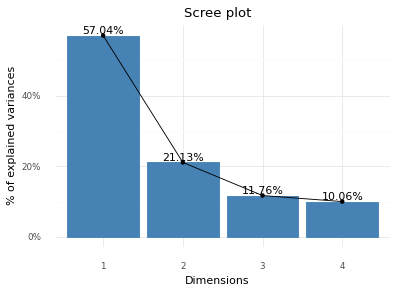

In [5]:
from scientisttools import fviz_eig
p = fviz_eig(res_ca,add_labels=True)
print(p)

## Row factor map

### Color by RGB color

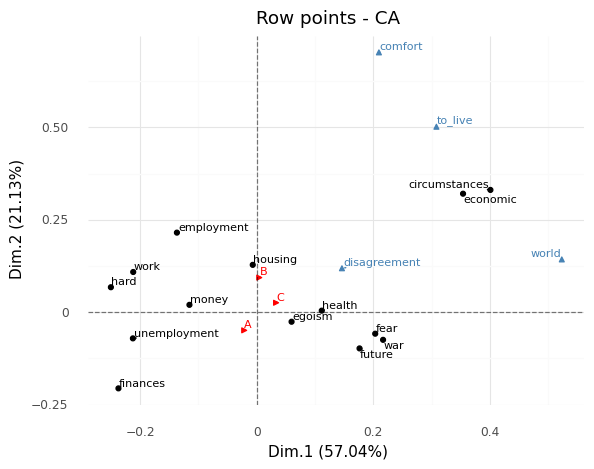

In [6]:
#color by RGB color
from scientisttools import fviz_ca_row
print(fviz_ca_row(res_ca,repel=True))

### Color by cos2

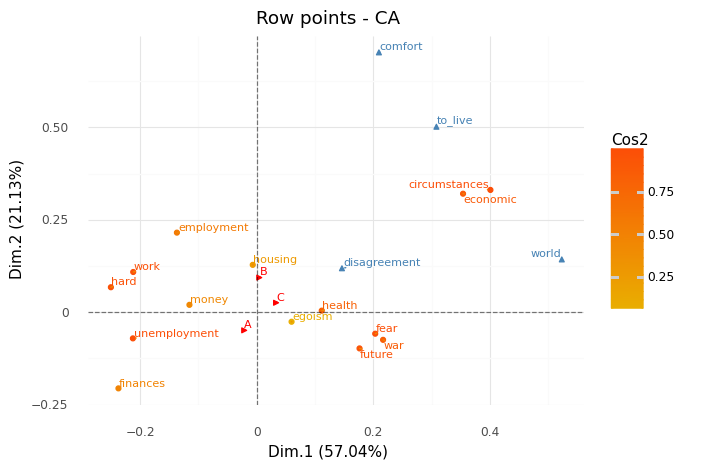

In [7]:
#color by cos2
print(fviz_ca_row(res_ca,col_row="cos2",repel=True))

### Color by contrib

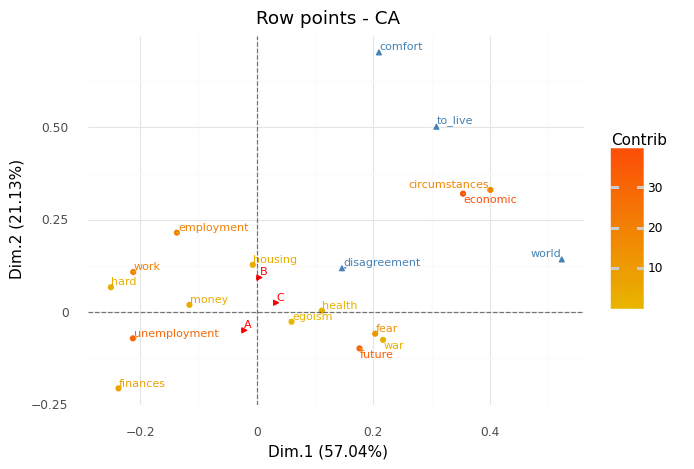

In [8]:
#color by contrib
print(fviz_ca_row(res_ca,col_row="contrib",repel=True))

### Color by quantitatives columns

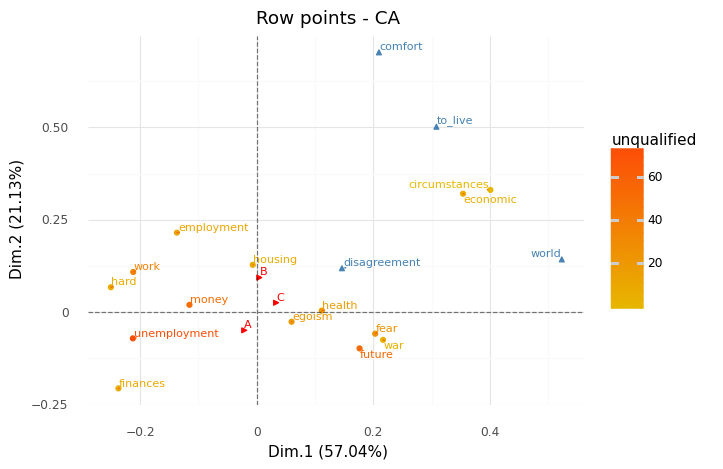

In [9]:
#color by quantitative variables
print(fviz_ca_row(res_ca,col_row="unqualified",repel=True))

### Color by numpy array

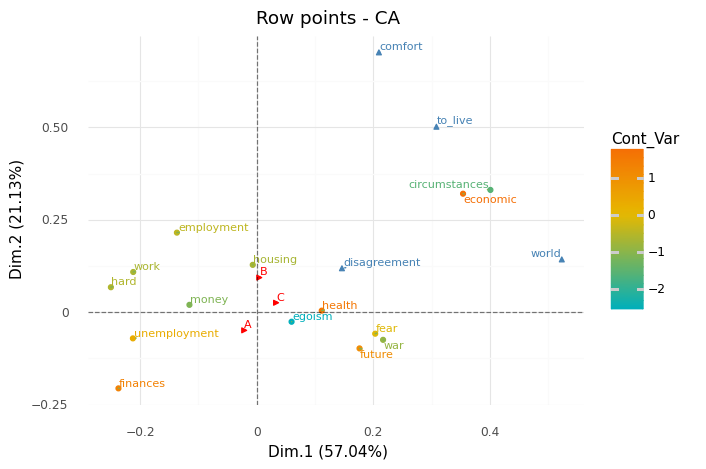

In [10]:
#color using numpy array
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_ca.call_.X.shape[0])
print(fviz_ca_row(res_ca,col_row=color_numpy,repel=True))

### Color by Kmeans

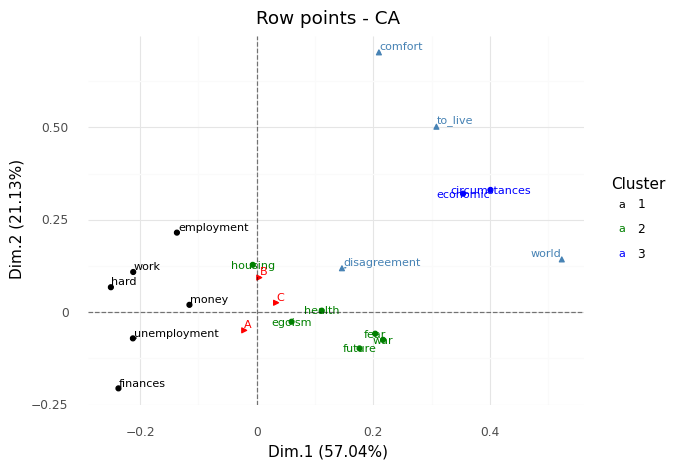

In [11]:
#color using kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_ca.row_.coord)
print(fviz_ca_row(res_ca,col_row=kmeans,repel=True))

### Color by qualitative

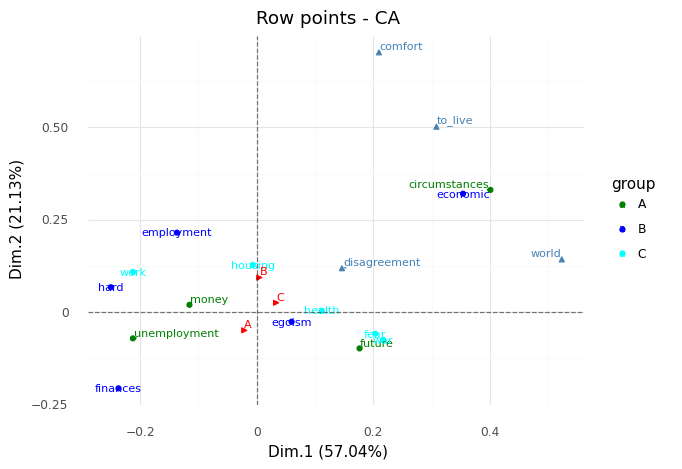

In [12]:
#color using qualitative variable
print(fviz_ca_row(res_ca,repel=True,habillage="group",add_ellipses=False))

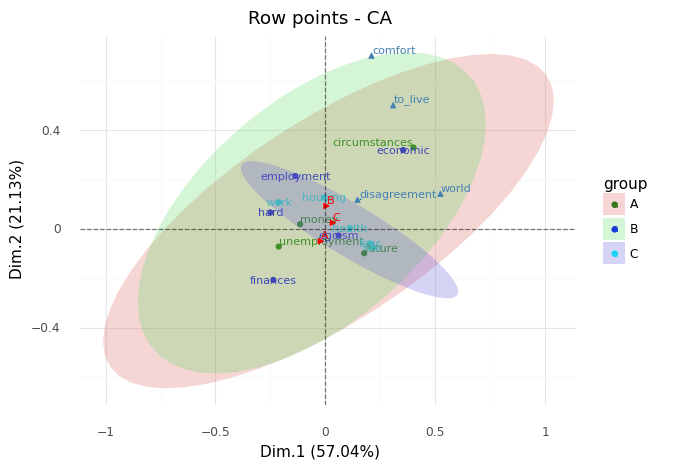

In [13]:
p = fviz_ca_row(res_ca,repel=True,habillage="group",add_ellipses=True)
print(p)

### Set limits

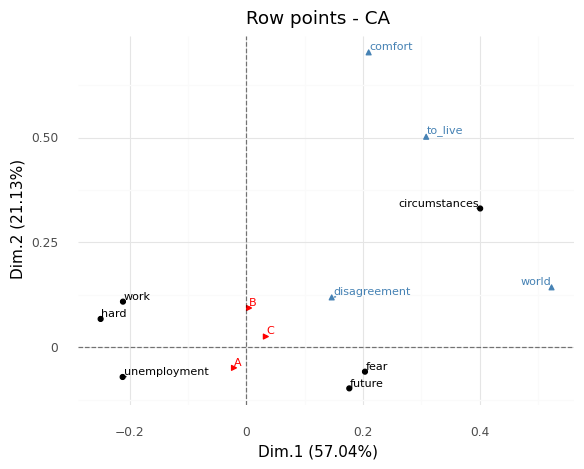

In [14]:
p = fviz_ca_row(res_ca,repel=True,lim_cos2=0.9)
print(p)

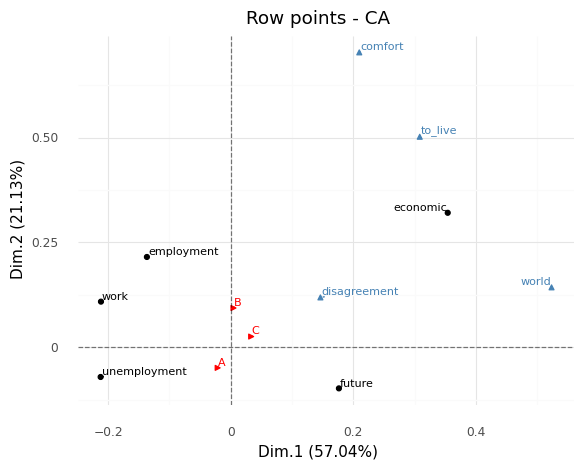

In [15]:
p = fviz_ca_row(res_ca,repel=True,lim_contrib=20)
print(p)

## Columns Factor Map

### Color by RGB

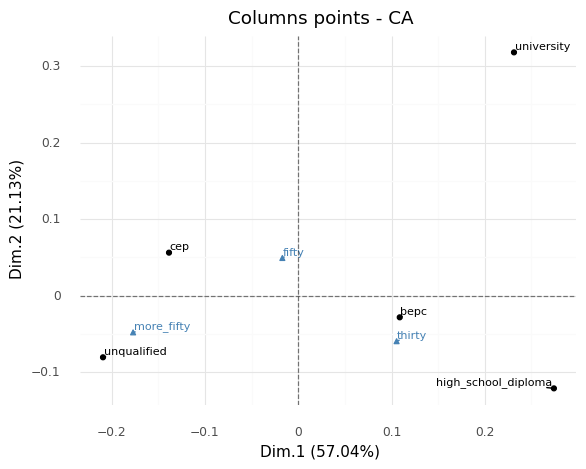

In [16]:
from scientisttools import fviz_ca_col
p = fviz_ca_col(res_ca,repel=True)
print(p)

### Color by numpy array

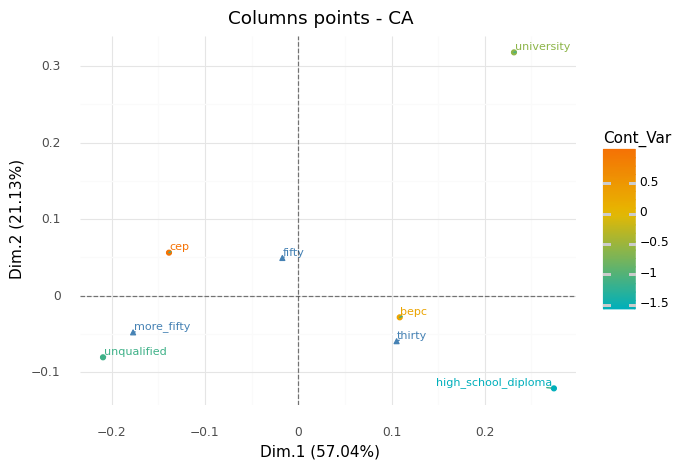

In [17]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_ca.call_.X.shape[1])
p = fviz_ca_col(res_ca,col_col=color_numpy,repel=True)
print(p)

### Color by kmeans

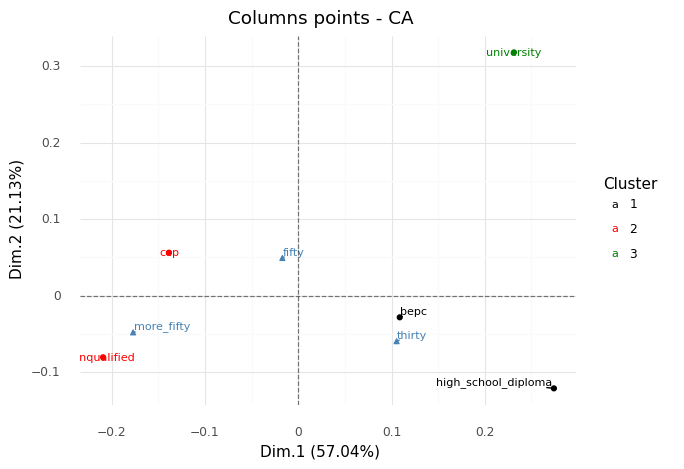

In [18]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_ca.col_.coord)
p = fviz_ca_col(res_ca,col_col=kmeans,repel=True)
print(p)

## Biplot

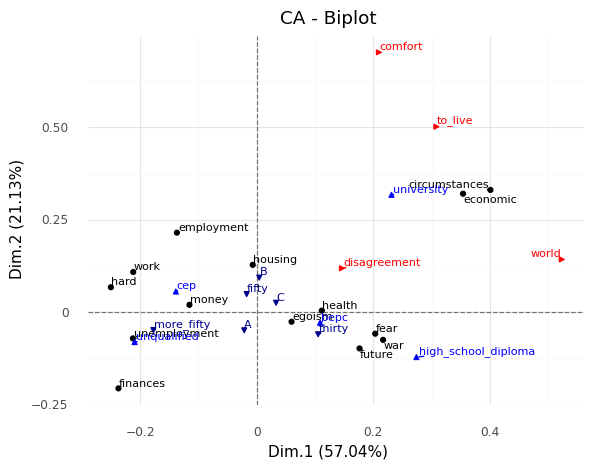

In [19]:
from scientisttools import fviz_ca_biplot
p = fviz_ca_biplot(res_ca)
print(p)

## Biplot

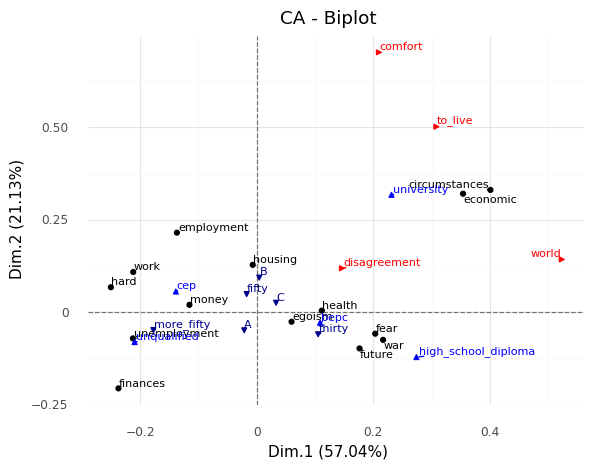

In [20]:
from scientisttools import fviz_ca_biplot
p = fviz_ca_biplot(res_ca)
print(p)

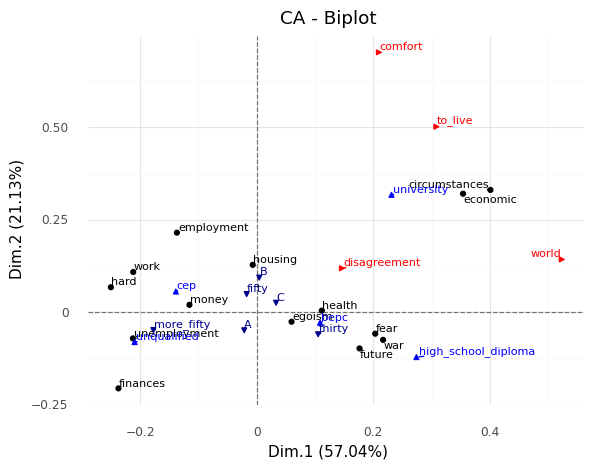

In [21]:
p = fviz_ca_biplot(res_ca)
print(p)

## Plot supplementary quantitative variables

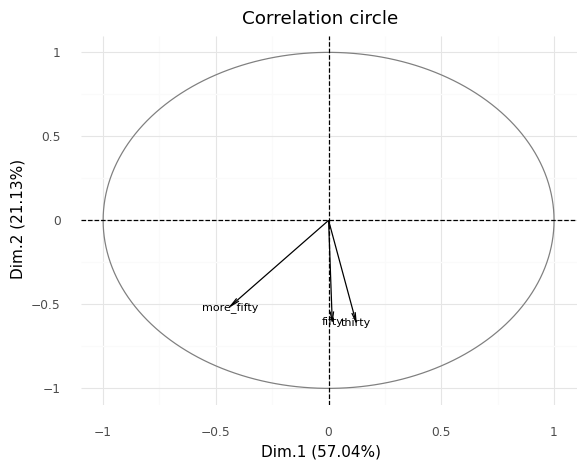

In [22]:
from scientisttools import fviz_corrcircle
print(fviz_corrcircle(res_ca2))

### plot contrib

No module named 'seaborn._oldcore'


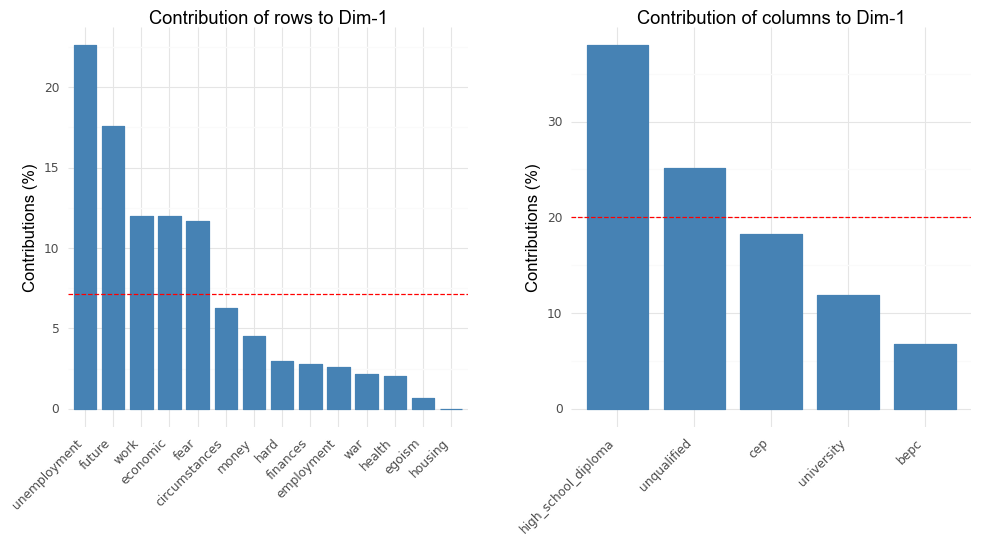

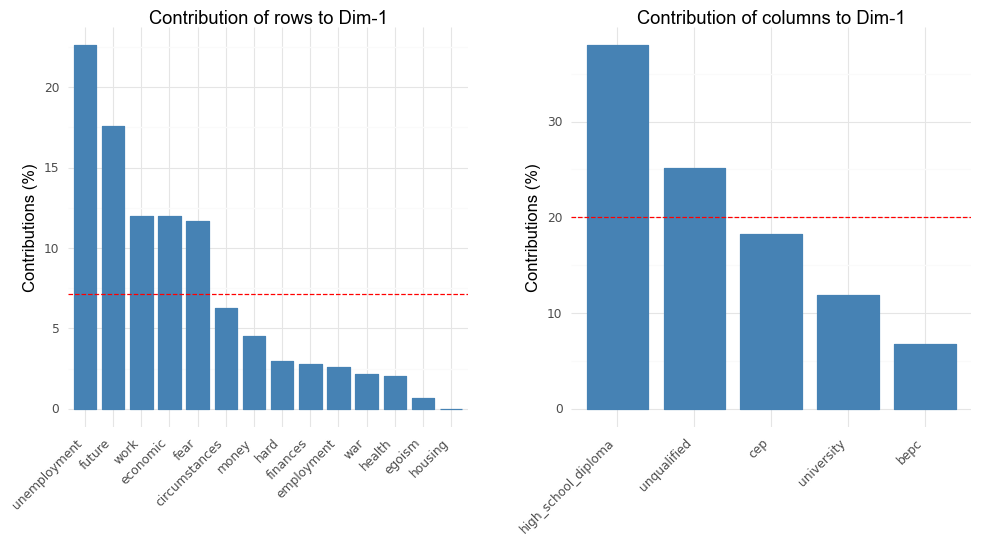

In [23]:
import patchworklib as pw
from scientisttools import fviz_contrib
p1, p2 = fviz_contrib(res_ca,choice="row"),fviz_contrib(res_ca,choice="col")
g1, g2 = pw.load_ggplot(p1, figsize=(4,4)), pw.load_ggplot(p2, figsize=(4,4))
(g1|g2).savefig()

## Plot cos2

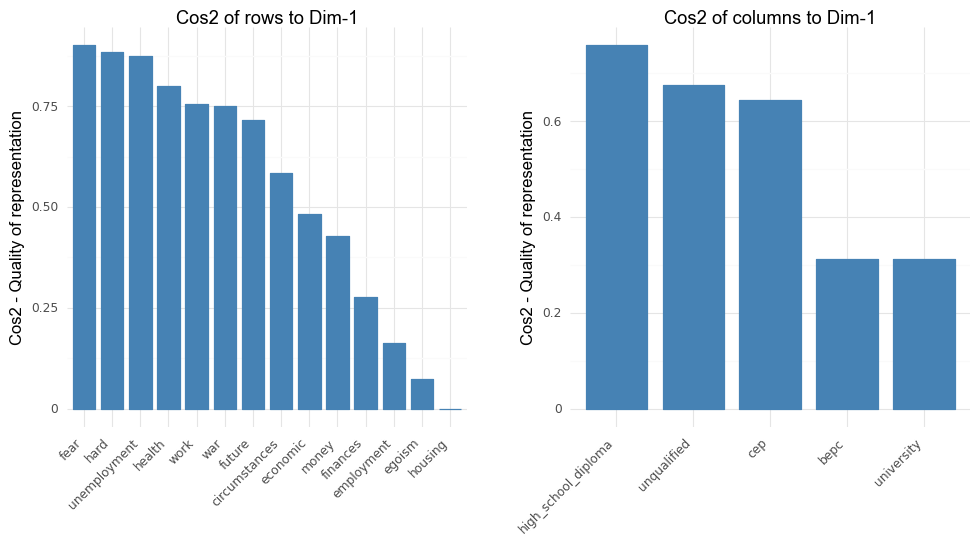

In [24]:
from scientisttools import fviz_cos2
p1, p2 = fviz_cos2(res_ca,choice="row"), fviz_cos2(res_ca,choice="col")
g1, g2 = pw.load_ggplot(p1, figsize=(4,4)), pw.load_ggplot(p2, figsize=(4,4))
(g1|g2).savefig()